# Intro to numerical differentiation. Finding roots.

## Practical code for finding roots of polynomials numerically.

In [5]:
import matplotlib.pyplot as plt
import numpy as np

## Polynomial operations

Polynomials are uniquely defined in their canonical form with the array of coefficients.

$$a_0 + a_1 x + a_2 x^2 + a_3 x^3 + \dots + a_n x^n \xleftrightarrow{\text{Equivalent}} \{a_0, a_1, a_2, a_3, \dots, a_n\}$$

That's why, in order to manipulate them in code, it's enough to have the coefficients in a `list`.


This is a function that evaluates a polynomial at a given $x$, given the coefficients in the array `coefficients`.

The way it works is:
If the polynomial is $f(x) = a_0 + a_1 x + a_2 x^2 + a_3x^3$, we do this:

- $f(x) =  a_3 \cdot x + a_2$
- Then, $f(x) = f(x) \cdot x + a_2 = a_3 \cdot x + a_2 = a_2 + a_3x$
- Then, $f(x) = f(x) \cdot x + a_1 = (a_2 + a_3x)x + a_1 = a_1 + a_2x + a_3x^2$
- The, $f(x) = f(x) \cdot x + a_0 = (a_1 + a_2 x + a_3x^2) x + a_0 = a_0 + a_1x + a_2x^2 + a_3x^3$

After that iterative process, we end up with the value we want.
Below, we have the code for that.

In [6]:
def polynomial(coefficients, x):
    """
    coefficients: [a0, a1, a2, ...] = a_0 + a_1*x + a_2*x^2 + ...
    """
    
    ans = 0
    for a in coefficients[::-1]:
        ans = ans*x + a
    return ans
    

This is a function that computes the derivative of a polynomial.


Given a polynomial $f(x) = a_0 + a_1 x + a_2 x^2 + a_3x^3 + \dots + a_nx^n$, its derivative is
$$\frac{df}{dx} = a_1 + 2a_2x + 3a_3x^2 + \dots + na_nx^{n - 1} \xleftrightarrow{\text{Equivalent}} \{a_1, 2a_2, 3a_3, \dots, na_n\}$$

This function receives the coefficients of the polynomial and returns the coefficients of its derivative

In [7]:
def get_derivative(coefficients):
    """
    coefficients: [a0, a1, a2, ...] = a_0 + a_1*x + a_2*x^2 + ...
    derivative: [a1, 2*a2, 3*a3, ...] = a_1 + 2*a_2*x + 3*a_3*x^2 + ...
    """
    
    result = []
    for i in range(1, len(coefficients)):
        result.append(i*coefficients[i])
    return result

In [8]:
assert get_derivative([1, 2, 3, 4]) == [2, 6, 12]
get_derivative([1, 2, 3, 4]) # 1 + 2x + 3x^2 + 4x^3 --> 2 + 6x + 12x^2

[2, 6, 12]

In [9]:
polynomial([1, 2, 3], 2) # 1 + 2x + 3x^2 = 17

17

## Newton's method

Newton's method makes use of a linear approximation of the function.
If we have a function $f(x)$, we can approximate it linearly near the point $x_0$ by:
$$f(x) \approx f(x_0) + f'(x_0) (x - x_0)$$

Thus, if we want to find a root of $f(x)$ near $x_0$, we can do:
$$0 = f(x_0) + f'(x_0) (x - x_0)$$
That gives us $$x = x_0 - \frac{f(x_0)}{f'(x_0)}$$

That gives us the root of the tangent line of the function at the point $x_0$, but also moves us closer to the root of the function.
We can continue doing that process until we're close enough.
That gives an algorithm like this:

$$
\begin{align*}
&\text{for } i \in \{0, 1, \ldots, n\_steps - 1\}: \\
&\quad \begin{aligned}
    &\quad \begin{aligned}
        x_{i+1} &= x_i - \frac{f(x_i)}{f'(x_i)}
    \end{aligned}
\end{aligned}
\end{align*}
$$

In [10]:
def newton(coefficients):
    derivative_coeffcients = get_derivative(coefficients)
    x = np.random.rand()
    threshold = 1e-3
    cnt_iter = 0
    while True:
        delta_x = polynomial(coefficients, x)/polynomial(derivative_coeffcients, x)
        if abs(delta_x) < threshold:
            break
        x = x - delta_x
        cnt_iter += 1
    print("Number of iterations: ", cnt_iter)
    return x

In [11]:
c = [-3, 0, 1] # -3 + x^2
newton(c)

Number of iterations:  4


1.7320513865844618

In [12]:
np.sqrt(3)

1.7320508075688772

## Bisection method

An alternative method to find a root of a function $f(x)$ in a range $(a, b)$ is the **Bisection Method**.

We will have the following assumptioms (one of the two):
- $f(a) < 0$ and $f(b) > 0$
- $f(a) > 0$ and $f(b) < 0$

Then, due to the [Intermediate Vaule Theorem](https://en.wikipedia.org/wiki/Intermediate_value_theorem), we know there's at least a root in the range $[a, b]$.

![Intermediate Value Theorem Example](https://upload.wikimedia.org/wikipedia/commons/thumb/8/83/Illustration_for_the_intermediate_value_theorem.svg/756px-Illustration_for_the_intermediate_value_theorem.svg.png)

Our invariant property (and we'll keep it that way all the time) is that $f(a)$ and $f(b)$ have opposite signs (that guarantees having a root in $(a, b)$).
Then, we pick a point $x \in (a, b)$ and evalute $f(x)$.
- If $f(x)$ has the same as $f(a)$, then $f(x)$ and $f(b)$ have opposite signs, which means there is a root in the range $(x, b)$.
- Otherwise, then $f(x)$ has the opposite of $f(a)$, which means there's a root in the range $(a, x)$.

That gives us an algorithm to find a root iteratively. For as long as we want, we pick the middle point of the current range, and according to the previous conditions, we decide to move to the left side or the right side of the range. That way, the range in which we are searching the root, gets halved each time, and after some time, it becomes so narrow that any number in the range will be close enough to the real root.


In [20]:
def bisection(coefficients, a, b):
    # assume fa and fb have different signs (fa * fb < 0)
    fa = polynomial(coefficients, a) 
    fb = polynomial(coefficients, b)
    threshold = 1e-10
    while b - a > threshold:
        m = (a + b) / 2
        fm = polynomial(coefficients, m)
        if fm == 0:
            return m 
        elif fa * fm > 0: # checking f(a) and f(m) have different signs
            a = m
            fa = fm
        else:
            b = m
    return (a + b) / 2

In [24]:
c = [-3, 0, 1] # -3 + x^2
bisection(c, 0, 2)

1.7320508075936232

In [25]:
bisection(c, -2, 0)

-1.7320508075936232

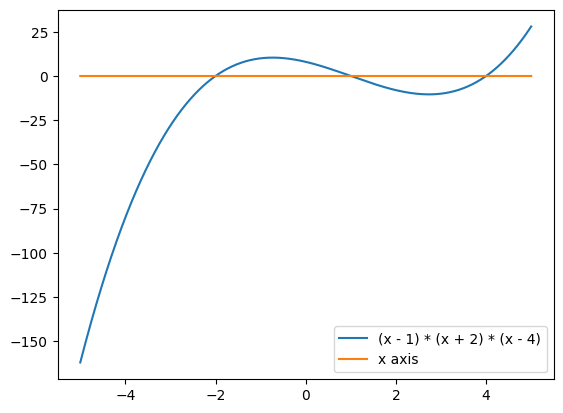

In [16]:
x = np.linspace(-5, 5, num=100000)
y = (x - 1) * (x + 2) * (x - 4) # [8, -6, -3, 1]
plt.plot(x, y, label='(x - 1) * (x + 2) * (x - 4)')
plt.plot(x, x * 0, label='x axis')
plt.legend()

## Using Bisection method and recursion in order to find all roots!

Explanation: TODO (coming soon)

In [18]:
def find_roots(coefficients, left, right):
    if len(coefficients) == 2: # degree = 1
        return [-coefficients[0] / coefficients[1]]
    derivative_coefficients = get_derivative(coefficients)
    extrema = find_roots(derivative_coefficients, left, right)
    extrema = [left] + extrema + [right]
    roots = []
    for i in range(len(extrema) - 1):
        root = bisection(coefficients, extrema[i], extrema[i + 1])
        roots.append(root)
    return roots 

In [19]:
c = [8, -6, -3, 1]
roots = find_roots(c, -5, 5)
for root in roots:
    print(round(root, 2))

-2.0
1.0
4.0
